# Log Transformations - Lab

## Introduction

It's time to practice some logarithmic transformations on the Ames Housing dataset!

## Objectives

You will be able to:

- Determine if a log transformation would be useful for a specific model or set of data
- Apply log transformations to independent and dependent variables in linear regression
- Interpret the coefficients of variables that have been transformed using a log transformation

## Ames Housing Data

Below we load the numeric features from the Ames Housing dataset into a dataframe. We also drop any rows with missing data.

In [1]:
# Run this cell without changes
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)
ames

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


## Identify Good Candidates for Log Transformation

Below we plot each of the potential numeric features against `SalePrice`:

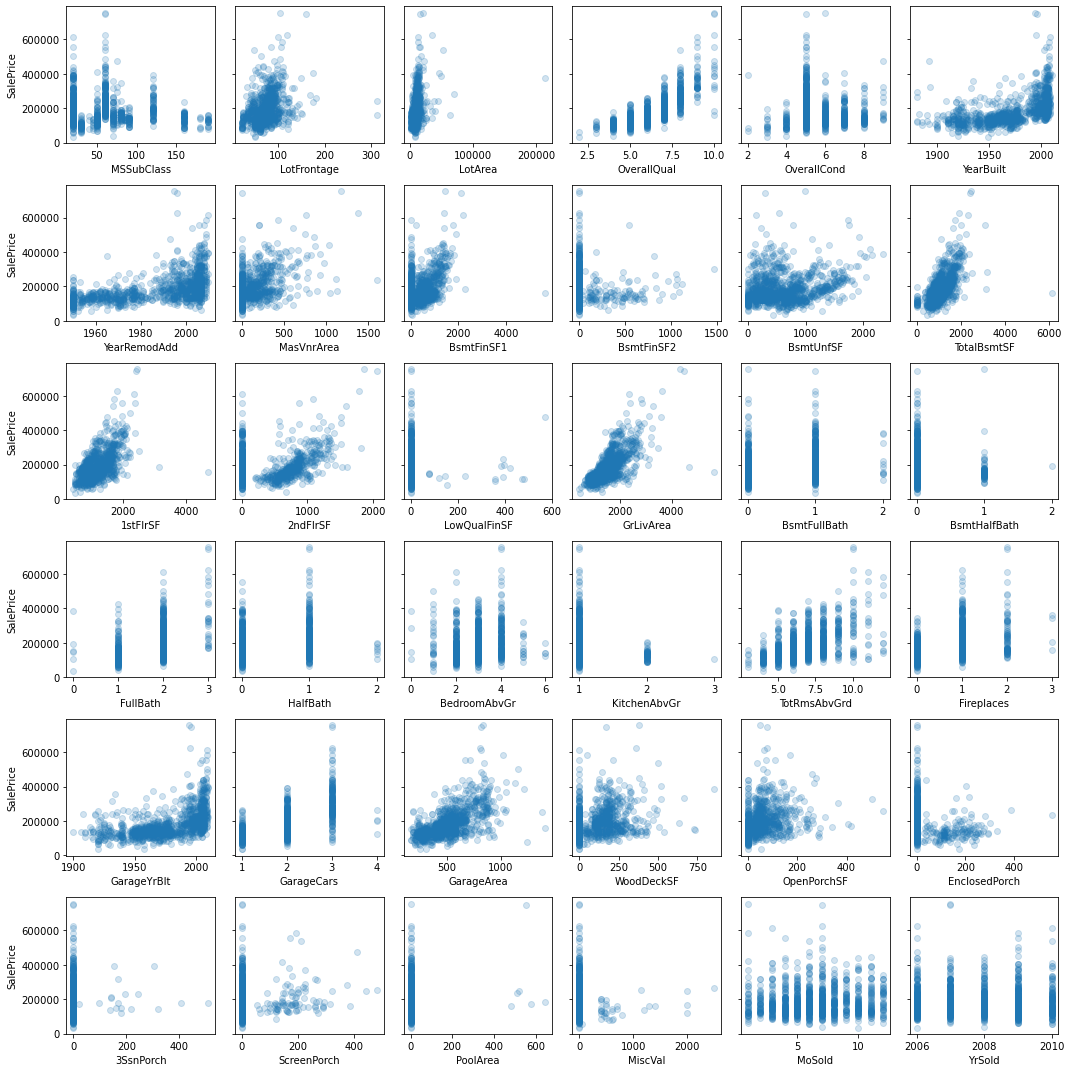

In [2]:
# Run this cell without changes
import matplotlib.pyplot as plt
import numpy as np

y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

Let's say we want to build a model with **at least one log-transformed feature** as well as a **log-transformed target**

Do you see any features that look like good candidates for this type of transformation?

For reference, a good candidate for this might look like any of these three graphs:

---

<div align="center"><div style="background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/256px-Population_vs_area.svg.png'); height: 200px; width: 256px;"></div><a title="Skbkekas, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Population_vs_area.svg">Skbkekas, CC BY-SA 3.0, via Wikimedia Commons</a></div>

---

<div align="center"><img src="http://sciences.usca.edu/biology/zelmer/305/trans/y.jpg" width="256"/>
<a href="http://sciences.usca.edu/biology/zelmer/305/trans/">Derek Zelmer, UCSA</a></div>

---

![e^x](https://curriculum-content.s3.amazonaws.com/data-science/images/log_graphs.png)

Try to find one feature that resembles each of these shapes.

Because this is real-world messy data, none of them are going to match perfectly, and that's ok!

In [3]:
# Your written answer here


### Plot Log Transformed Versions of Features

For each feature that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

C:\Users\Willy\Downloads\Anaconda\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


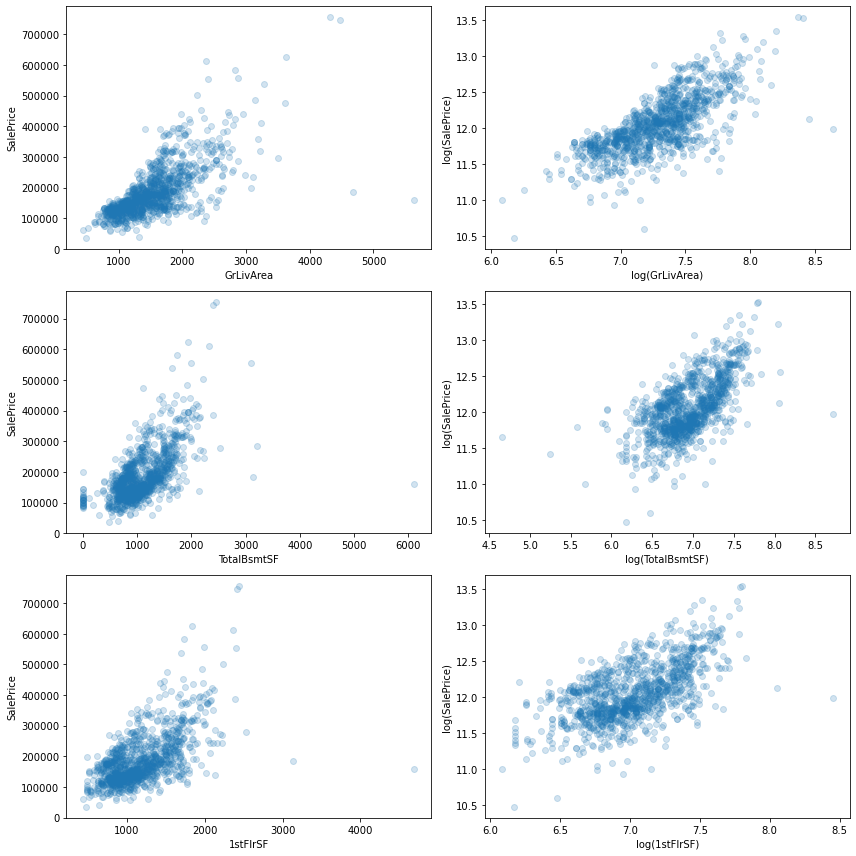

In [4]:
# Your code here
features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Plot original and log-transformed features against SalePrice
for i, feature in enumerate(features):
    # Original feature vs. SalePrice
    axes[i][0].scatter(ames[feature], y, alpha=0.2)
    axes[i][0].set_xlabel(feature)
    axes[i][0].set_ylabel("SalePrice")
    
    # Log-transformed feature vs. log-transformed SalePrice
    axes[i][1].scatter(np.log(ames[feature]), np.log(y), alpha=0.2)
    axes[i][1].set_xlabel(f'log({feature})')
    axes[i][1].set_ylabel("log(SalePrice)")

fig.tight_layout()
plt.show()


Do the transformed relationships look more linear? If so, they should be included in the model.

## Build a Model with Log-Transformed Features and Target

### Data Preparation

Choose up to 3 of the features you investigated, and set up an X dataframe containing the log-transformed versions of these features as well as a y series containing the log-transformed version of the target.

---

<details>
    <summary style="cursor: pointer"><b>Hint (click to reveal)</b></summary>

If you are planning log transform a feature measured in _years_ (e.g. `YearRemodAdd`) consider shifting the data first. For example, you might subtract 1900 or 1910 from the year, so that a 1% increase in year is closer to meaning 1 year rather than 20 years.

</details>

In [6]:
# Your code here - prepare data for modeling
x = np.log(ames[features])
y = np.log(ames["SalePrice"])

<ipython-input-6-9c08fe96e4a1>:2: RuntimeWarning: divide by zero encountered in log
  x = np.log(ames[features])


### Modeling

Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.

In [7]:
# Your code here - build a model
import statsmodels.api as sm

#Adding a constant to the model (intercept)
X = sm.add_constant(X)

#building the model
model = sm.OLS(y, X).fit()

#Summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:22:11   Log-Likelihood:                 564.59
No. Observations:                1121   AIC:                            -1059.
Df Residuals:                    1086   BIC:                            -883.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.7610      6.868      2.295      0.022       2.285      29.237
MSSubClass       -0.0007      0.000     -5.126      0.000      -0.001      -0.000
LotFrontage   -4.529e-05      0.000     -0.183      0.855      -0.001       0.000
LotArea         1.73e-06   6.35e-07      2.723      0.007    4.83e-07    2.98e-06
OverallQual       0.0885      0.006     14.830      0.000       0.077       0.100
OverallCond       0.0497      0.006      9.000      0.000       0.039       0.061
YearBuilt         0.0026      0.000      7.338      0.000       0.002       0.003
YearRemodAdd      0.0011      0.000      3.111      0.002       0.000       0.002
MasVnrArea     1.201e-05   2.83e-05      0.425      0.671   -4.35e-05    6.75e-05
BsmtFinSF1     2.853e-05   1.26e-05      2.258      0.024    3.74e-06    5.33e-05
BsmtFinSF2     1.293e-05   2.26e-05      0.573      0.567   -3.13e-05    5.72e-05
BsmtUnfSF     -3.762e-06   1.19e-05     -0.317      0.751    -2.7e-05    1.95e-05
TotalBsmtSF    3.769e-05    1.7e-05      2.211      0.027    4.24e-06    7.11e-05
1stFlrSF        6.59e-05   3.42e-05      1.928      0.054   -1.16e-06       0.000
2ndFlrSF       3.087e-05   3.11e-05      0.992      0.321   -3.02e-05    9.19e-05
LowQualFinSF   1.779e-05   8.44e-05      0.211      0.833      -0.000       0.000
GrLivArea         0.0001   3.13e-05      3.659      0.000    5.31e-05       0.000
BsmtFullBath      0.0624      0.013      4.835      0.000       0.037       0.088
BsmtHalfBath      0.0159      0.020      0.774      0.439      -0.024       0.056
FullBath          0.0546      0.014      3.834      0.000       0.027       0.083
HalfBath          0.0302      0.013      2.253      0.024       0.004       0.057
BedroomAbvGr     -0.0054      0.009     -0.622      0.534      -0.022       0.012
KitchenAbvGr     -0.0883      0.027     -3.262      0.001      -0.141      -0.035
TotRmsAbvGrd      0.0183      0.006      3.048      0.002       0.007       0.030
Fireplaces        0.0471      0.009      5.329      0.000       0.030       0.064
GarageYrBlt    9.977e-05      0.000      0.272      0.786      -0.001       0.001
GarageCars        0.0680      0.014      4.828      0.000       0.040       0.096
GarageArea     2.817e-05   4.89e-05      0.576      0.565   -6.78e-05       0.000
WoodDeckSF     9.691e-05   4.05e-05      2.395      0.017    1.75e-05       0.000
OpenPorchSF    5.277e-05   7.87e-05      0.671      0.502      -0.000       0.000
EnclosedPorch     0.0002   8.32e-05      2.085      0.037    1.03e-05       0.000
3SsnPorch         0.0003      0.000      1.724      0.085    -3.6e-05       0.001
ScreenPorch       0.0004   8.24e-05      4.400      0.000       0.000       0.001
PoolArea         -0.0006      0.000     -4.698      0.000      -0.001      -0.000
MiscVal       -1.908e-05   2.81e-05     -0.679   

### Model Evaluation and Interpretation

How did the model perform? How might we interpret its coefficients? Create as many cells as needed.

In [8]:
# Your code here - evaluate the model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:22:11   Log-Likelihood:                 564.59
No. Observations:                1121   AIC:                            -1059.
Df Residuals:                    1086   BIC:                            -883.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.7610      6.868      2.295      0.022       2.285      29.237
MSSubClass       -0.0007      0.000     -5.126      0.000      -0.001      -0.000
LotFrontage   -4.529e-05      0.000     -0.183      0.855      -0.001       0.000
LotArea         1.73e-06   6.35e-07      2.723      0.007    4.83e-07    2.98e-06
OverallQual       0.0885      0.006     14.830      0.000       0.077       0.100
OverallCond       0.0497      0.006      9.000      0.000       0.039       0.061
YearBuilt         0.0026      0.000      7.338      0.000       0.002       0.003
YearRemodAdd      0.0011      0.000      3.111      0.002       0.000       0.002
MasVnrArea     1.201e-05   2.83e-05      0.425      0.671   -4.35e-05    6.75e-05
BsmtFinSF1     2.853e-05   1.26e-05      2.258      0.024    3.74e-06    5.33e-05
BsmtFinSF2     1.293e-05   2.26e-05      0.573      0.567   -3.13e-05    5.72e-05
BsmtUnfSF     -3.762e-06   1.19e-05     -0.317      0.751    -2.7e-05    1.95e-05
TotalBsmtSF    3.769e-05    1.7e-05      2.211      0.027    4.24e-06    7.11e-05
1stFlrSF        6.59e-05   3.42e-05      1.928      0.054   -1.16e-06       0.000
2ndFlrSF       3.087e-05   3.11e-05      0.992      0.321   -3.02e-05    9.19e-05
LowQualFinSF   1.779e-05   8.44e-05      0.211      0.833      -0.000       0.000
GrLivArea         0.0001   3.13e-05      3.659      0.000    5.31e-05       0.000
BsmtFullBath      0.0624      0.013      4.835      0.000       0.037       0.088
BsmtHalfBath      0.0159      0.020      0.774      0.439      -0.024       0.056
FullBath          0.0546      0.014      3.834      0.000       0.027       0.083
HalfBath          0.0302      0.013      2.253      0.024       0.004       0.057
BedroomAbvGr     -0.0054      0.009     -0.622      0.534      -0.022       0.012
KitchenAbvGr     -0.0883      0.027     -3.262      0.001      -0.141      -0.035
TotRmsAbvGrd      0.0183      0.006      3.048      0.002       0.007       0.030
Fireplaces        0.0471      0.009      5.329      0.000       0.030       0.064
GarageYrBlt    9.977e-05      0.000      0.272      0.786      -0.001       0.001
GarageCars        0.0680      0.014      4.828      0.000       0.040       0.096
GarageArea     2.817e-05   4.89e-05      0.576      0.565   -6.78e-05       0.000
WoodDeckSF     9.691e-05   4.05e-05      2.395      0.017    1.75e-05       0.000
OpenPorchSF    5.277e-05   7.87e-05      0.671      0.502      -0.000       0.000
EnclosedPorch     0.0002   8.32e-05      2.085      0.037    1.03e-05       0.000
3SsnPorch         0.0003      0.000      1.724      0.085    -3.6e-05       0.001
ScreenPorch       0.0004   8.24e-05      4.400      0.000       0.000       0.001
PoolArea         -0.0006      0.000     -4.698      0.000      -0.001      -0.000
MiscVal       -1.908e-05   2.81e-05     -0.679   

## Summary

Now you have practiced modeling with log transformations! This is a subtle, messy process, so don't be discouraged if this was a tricky lab.